# Project 2 : Credit Card Fraud Detection

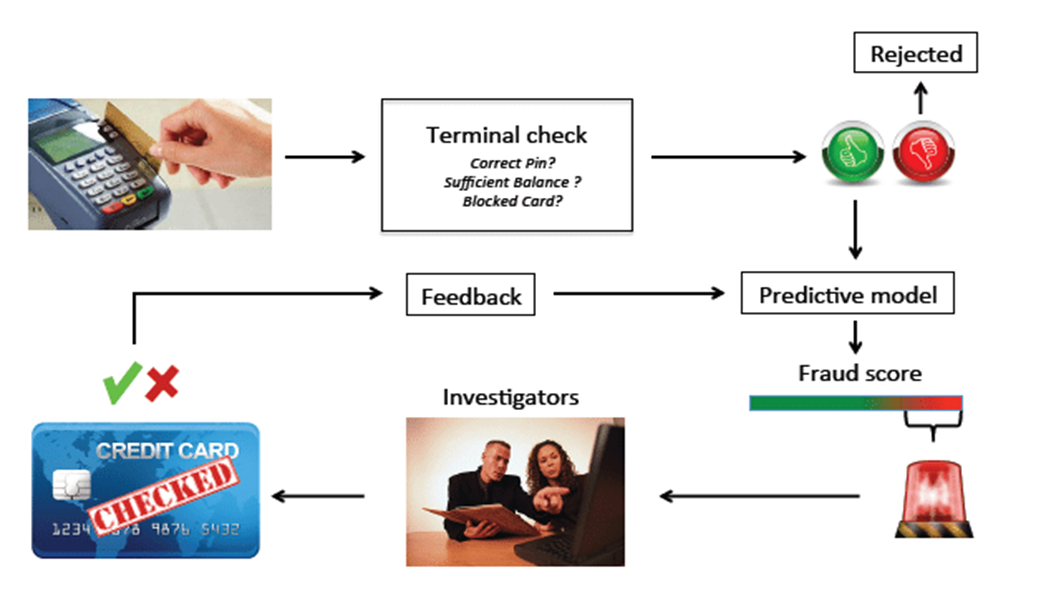

The Credit Card Fraud Detection Problem includes modeling past credit card transactions with the knowledge of the ones that turned out to be fraud. This model is then used to identify whether a new transaction is fraudulent or not.


## About Dataset :

This data set is uploaded in order to get the insights of Credit card Defaultees based on the respective attributes.Dataset contains 307510 rows and 122 columns including target columns. Here our aim is to clean the dataset and find some good insight from it.

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import pickle
import os
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
#LOADING THE DATASET
data = pd.read_csv('application_data.csv')

In [3]:
#READ THE DATA
data.head(15)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data1 = data.copy()

In [5]:
data.shape

(307511, 122)

In [6]:
data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [7]:
data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [8]:
#CHECKING IF ANY NULL VALUES ARE PRESENT
data.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
#GETTING THE INFORMATION
data.info(verbose= True,memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

## Memory Usage :

When dealing with a large amount of data, we have to be careful with how we use memory. Shortage of memory is a common issue when we have a large amount of data at hand. In case the entire RAM space is consumed, the program can crash and throw a MemoryError, which can be tricky to handle at times. Limiting the memory usage becomes important in this case. Reducing memory usage also speeds up computation and helps save time.

In [11]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
data = reduce_mem_usage(data)

Memory usage of dataframe is 286.23 MB
Memory usage after optimization is: 59.54 MB
Decreased by 79.2%


In [12]:
data.info(verbose= True,memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype   
---   ------                        -----   
 0    SK_ID_CURR                    int32   
 1    TARGET                        int8    
 2    NAME_CONTRACT_TYPE            category
 3    CODE_GENDER                   category
 4    FLAG_OWN_CAR                  category
 5    FLAG_OWN_REALTY               category
 6    CNT_CHILDREN                  int8    
 7    AMT_INCOME_TOTAL              float32 
 8    AMT_CREDIT                    float32 
 9    AMT_ANNUITY                   float32 
 10   AMT_GOODS_PRICE               float32 
 11   NAME_TYPE_SUITE               category
 12   NAME_INCOME_TYPE              category
 13   NAME_EDUCATION_TYPE           category
 14   NAME_FAMILY_STATUS            category
 15   NAME_HOUSING_TYPE             category
 16   REGION_POPULATION_RELATIVE    float16 
 17   DAYS_BIRTH                 

As the dataset is too large, we divide the dataset into 3 part's (Categorical,integer,float) based on its datatype and then analyze it.

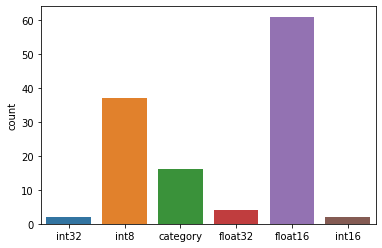

In [13]:
sns.countplot(data.dtypes.map(str))
plt.show()

In [14]:
data.NAME_TYPE_SUITE.unique()

['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_A', NaN, 'Other_B', 'Group of people']
Categories (7, object): ['Children', 'Family', 'Group of people', 'Other_A', 'Other_B', 'Spouse, partner', 'Unaccompanied']

In [15]:
data.NAME_EDUCATION_TYPE.unique()

['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']
Categories (5, object): ['Academic degree', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Secondary / secondary special']

In [16]:
data.NAME_HOUSING_TYPE.unique()

['House / apartment', 'Rented apartment', 'With parents', 'Municipal apartment', 'Office apartment', 'Co-op apartment']
Categories (6, object): ['Co-op apartment', 'House / apartment', 'Municipal apartment', 'Office apartment', 'Rented apartment', 'With parents']

In [17]:
data.NAME_INCOME_TYPE.unique()

['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']
Categories (8, object): ['Businessman', 'Commercial associate', 'Maternity leave', 'Pensioner', 'State servant', 'Student', 'Unemployed', 'Working']

## Categorical Type Values:

In [18]:
print("Categorical type data : ", np.count_nonzero(data.select_dtypes('category').columns))
print("---------------------------------------------------")
print(data.select_dtypes('category').columns)

Categorical type data :  16
---------------------------------------------------
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


## Label Encoding:

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['NAME_CONTRACT_TYPE'] = le.fit_transform(data['NAME_CONTRACT_TYPE'])
data['CODE_GENDER'] = le.fit_transform(data['CODE_GENDER'])
data['FLAG_OWN_CAR'] = le.fit_transform(data['FLAG_OWN_CAR'])
data['FLAG_OWN_REALTY'] = le.fit_transform(data['FLAG_OWN_REALTY'])
data['NAME_TYPE_SUITE'] = le.fit_transform(data['NAME_TYPE_SUITE'].astype(str))
data['NAME_INCOME_TYPE'] = le.fit_transform(data['NAME_INCOME_TYPE'])
data['NAME_EDUCATION_TYPE'] = le.fit_transform(data['NAME_EDUCATION_TYPE'])
data['NAME_FAMILY_STATUS'] = le.fit_transform(data['NAME_FAMILY_STATUS'])
data['NAME_HOUSING_TYPE'] = le.fit_transform(data['NAME_HOUSING_TYPE'])
data['OCCUPATION_TYPE'] = le.fit_transform(data['OCCUPATION_TYPE'].astype(str))
data['WEEKDAY_APPR_PROCESS_START'] = le.fit_transform(data['WEEKDAY_APPR_PROCESS_START'])
data['ORGANIZATION_TYPE'] = le.fit_transform(data['ORGANIZATION_TYPE'])
data['FONDKAPREMONT_MODE'] = le.fit_transform(data['FONDKAPREMONT_MODE'].astype(str))
data['HOUSETYPE_MODE'] = le.fit_transform(data['HOUSETYPE_MODE'].astype(str))
data['WALLSMATERIAL_MODE'] = le.fit_transform(data['WALLSMATERIAL_MODE'].astype(str))
data['EMERGENCYSTATE_MODE'] = le.fit_transform(data['EMERGENCYSTATE_MODE'].astype(str))

In [20]:
data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,1,0,0,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,0,0,0,1,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,0,0,0,1,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,0,0,0,1,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## Missing Value Detection:
Missing values occur when no data is recorded for an observation; you intended to make an observation but did not. Missing data are a common occurrence and can have a significant effect on the statistical analysis. Missing values arise due to many reasons.

In [21]:
def colors(value):
    if value > 50 and value < 100:
        color = 'red'
    elif value > 154000 and value < 250000:
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color

def missing(df):
    total = df.isnull().sum().sort_values(ascending = False)
    total = total[total>0]
    percent = df.isnull().sum().sort_values(ascending = False)/len(df)*100
    percent = percent[percent>0]
    return pd.concat([total, percent], axis=1, keys=['"Total','Percentage']).style.applymap(colors)
print("Missing Values of Categorical variables are as :")
missing(data1.select_dtypes('object'))

Missing Values of Categorical variables are as :


,"""Total",Percentage
FONDKAPREMONT_MODE,210295,68.386172
WALLSMATERIAL_MODE,156341,50.840783
HOUSETYPE_MODE,154297,50.176091
EMERGENCYSTATE_MODE,145755,47.398304
OCCUPATION_TYPE,96391,31.345545
NAME_TYPE_SUITE,1292,0.420148


## Missing value Imputation : Mode

In [22]:
def mode_impute(df,col):
    return df[col].fillna(df[col].mode()[0])
data1['FONDKAPREMONT_MODE'] = mode_impute(data1,'FONDKAPREMONT_MODE')
data1['WALLSMATERIAL_MODE'] = mode_impute(data1,'WALLSMATERIAL_MODE')
data1['HOUSETYPE_MODE'] = mode_impute(data1,'HOUSETYPE_MODE')
data1['EMERGENCYSTATE_MODE'] = mode_impute(data1,'EMERGENCYSTATE_MODE')
data1['OCCUPATION_TYPE'] = mode_impute(data1,'OCCUPATION_TYPE')
data1['NAME_TYPE_SUITE'] = mode_impute(data1,'NAME_TYPE_SUITE')
missing(data1.select_dtypes('object'))

,"""Total",Percentage


## Descriptive Statistics

In [23]:
data1.describe(include=['O']).T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,307511,7,Unaccompanied,249818
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,307511,18,Laborers,151577


## Integer Type Value's:

In [24]:
print("Integer type data : ", np.count_nonzero(data1.select_dtypes('int').columns))
print("---------------------------------------------------")
print(data1.select_dtypes('int').columns)

Integer type data :  41
---------------------------------------------------
Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMEN

## Missing Value detection

In [25]:
print("Missing values of integer variables are as :")
missing(data1.select_dtypes('int'))

Missing values of integer variables are as :


,"""Total",Percentage


Here, in Integer Type Variables we see there is no missing values are present.

## Descriptive Statistics

In [26]:
data1.select_dtypes('int').agg(['count','min', 'max','mad','mean','median','quantile','kurt','skew','var','std'])

,SK_ID_CURR,TARGET,CNT_CHILDREN,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
count,3.075110e+05,307511.000000,307511.000000,3.075110e+05,3.075110e+05,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000
min,1.000020e+05,0.000000,0.000000,-2.522900e+04,-1.791200e+04,-7.197000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.562550e+05,1.000000,19.000000,-7.489000e+03,3.652430e+05,0.000000e+00,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
mad,8.901023e+04,0.148423,0.584180,3.728372e+03,1.085572e+05,1.316243e+03,0.000007,0.295342,0.319241,0.003726,...,0.000013,0.007025,0.005856,0.002416,0.019659,0.000533,0.016127,0.001189,0.001014,0.000670
mean,2.781805e+05,0.080729,0.417052,-1.603700e+04,6.381505e+04,-2.994202e+03,0.999997,0.819889,0.199368,0.998133,...,0.000007,0.003525,0.002936,0.001210,0.009928,0.000267,0.008130,0.000595,0.000507,0.000335
median,2.782020e+05,0.000000,0.000000,-1.575000e+04,-1.213000e+03,-3.254000e+03,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
quantile,2.782020e+05,0.000000,0.000000,-1.575000e+04,-1.213000e+03,-3.254000e+03,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
kurt,-1.198988e+00,7.475109,7.904106,-1.049126e+00,7.716124e-01,-1.106808e+00,307511.000000,0.771852,0.264876,530.743969,...,153752.999974,278.689823,335.552164,821.657064,95.735809,3745.195328,118.014535,1675.415835,1966.256856,2980.592507
skew,-1.200235e-03,3.078159,1.974604,-1.156733e-01,1.664346e+00,3.493275e-01,-554.536744,-1.664886,1.504950,-23.081172,...,392.114779,16.753746,18.372533,28.699333,9.886111,61.214140,10.955080,40.956134,44.364897,54.612939
var,1.056582e+10,0.074212,0.521459,1.904440e+07,1.995884e+10,2.278441e+06,0.000003,0.147671,0.159621,0.001863,...,0.000007,0.003513,0.002928,0.001208,0.009830,0.000267,0.008064,0.000595,0.000507,0.000335


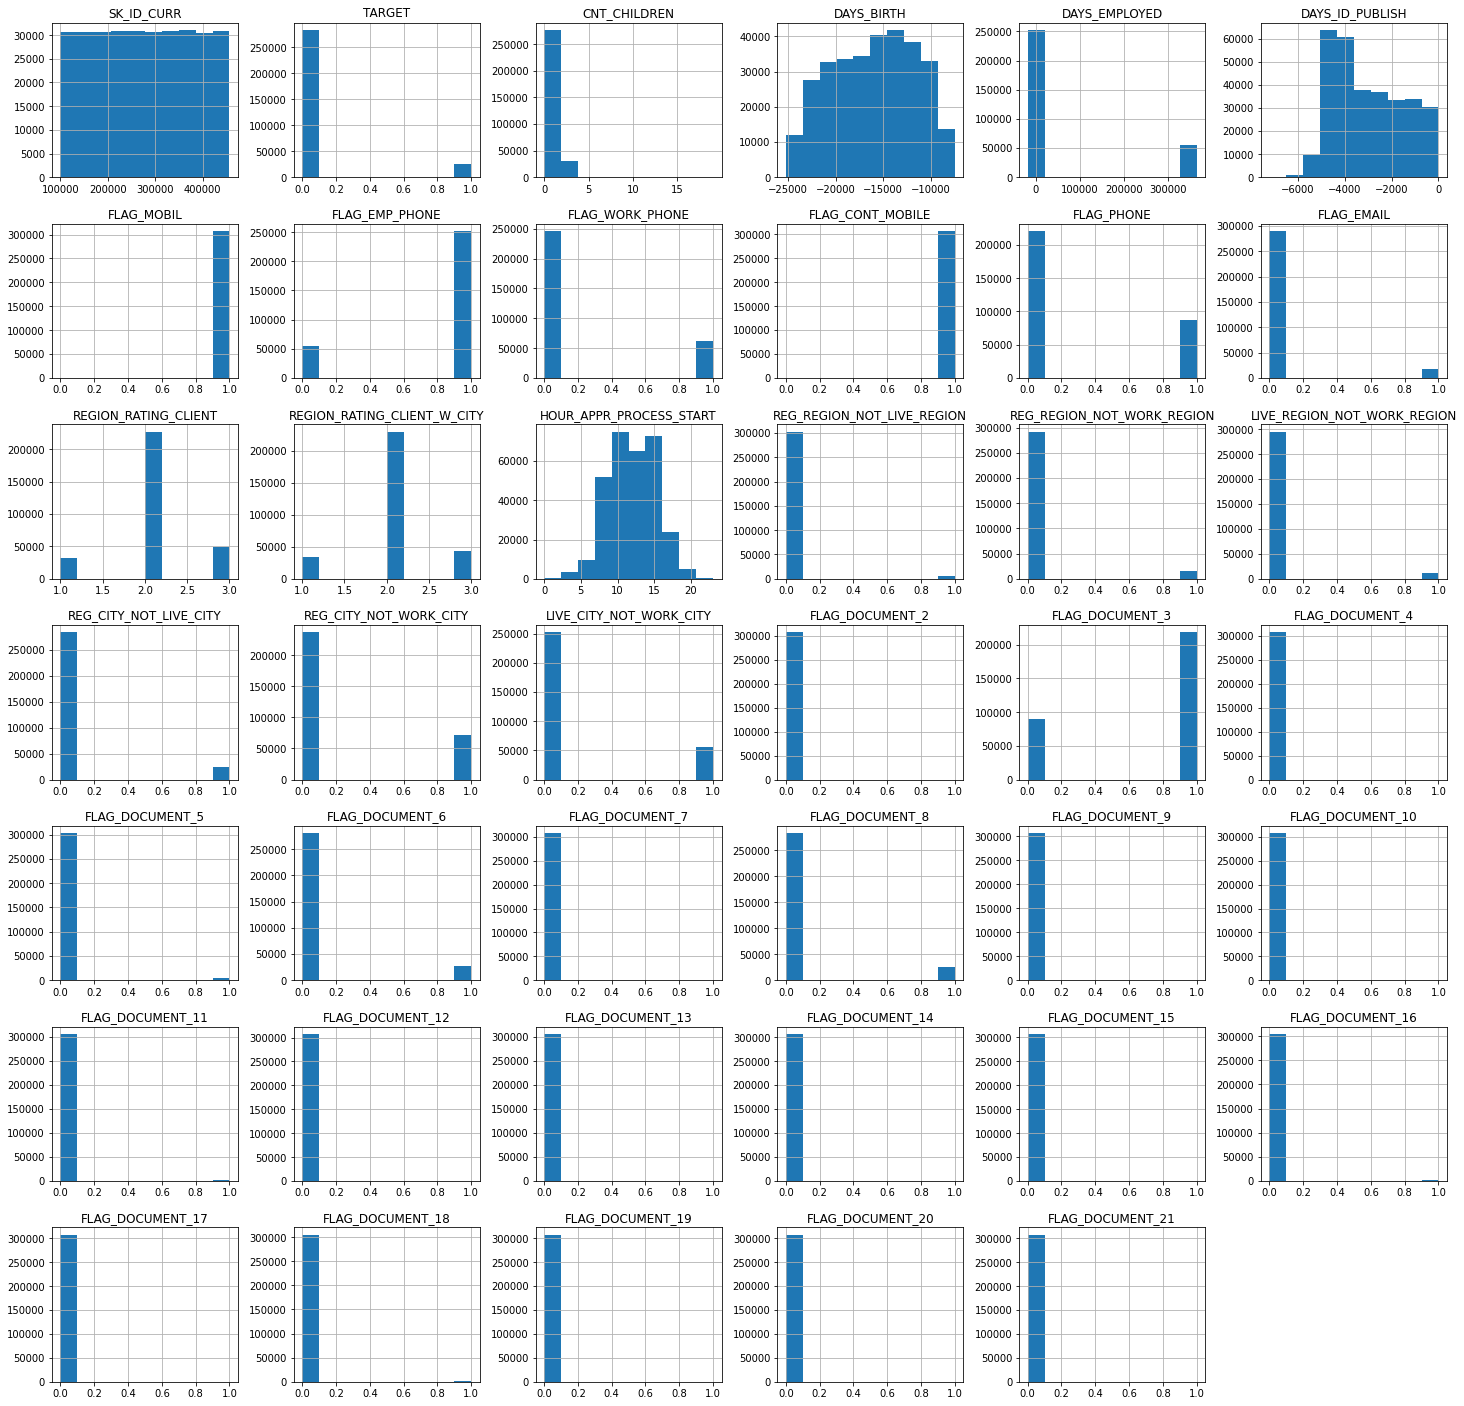

In [27]:
data1.select_dtypes('int').hist(figsize=(25,25))
plt.show()

## Outlier Detection For Integer Type Variable:
Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

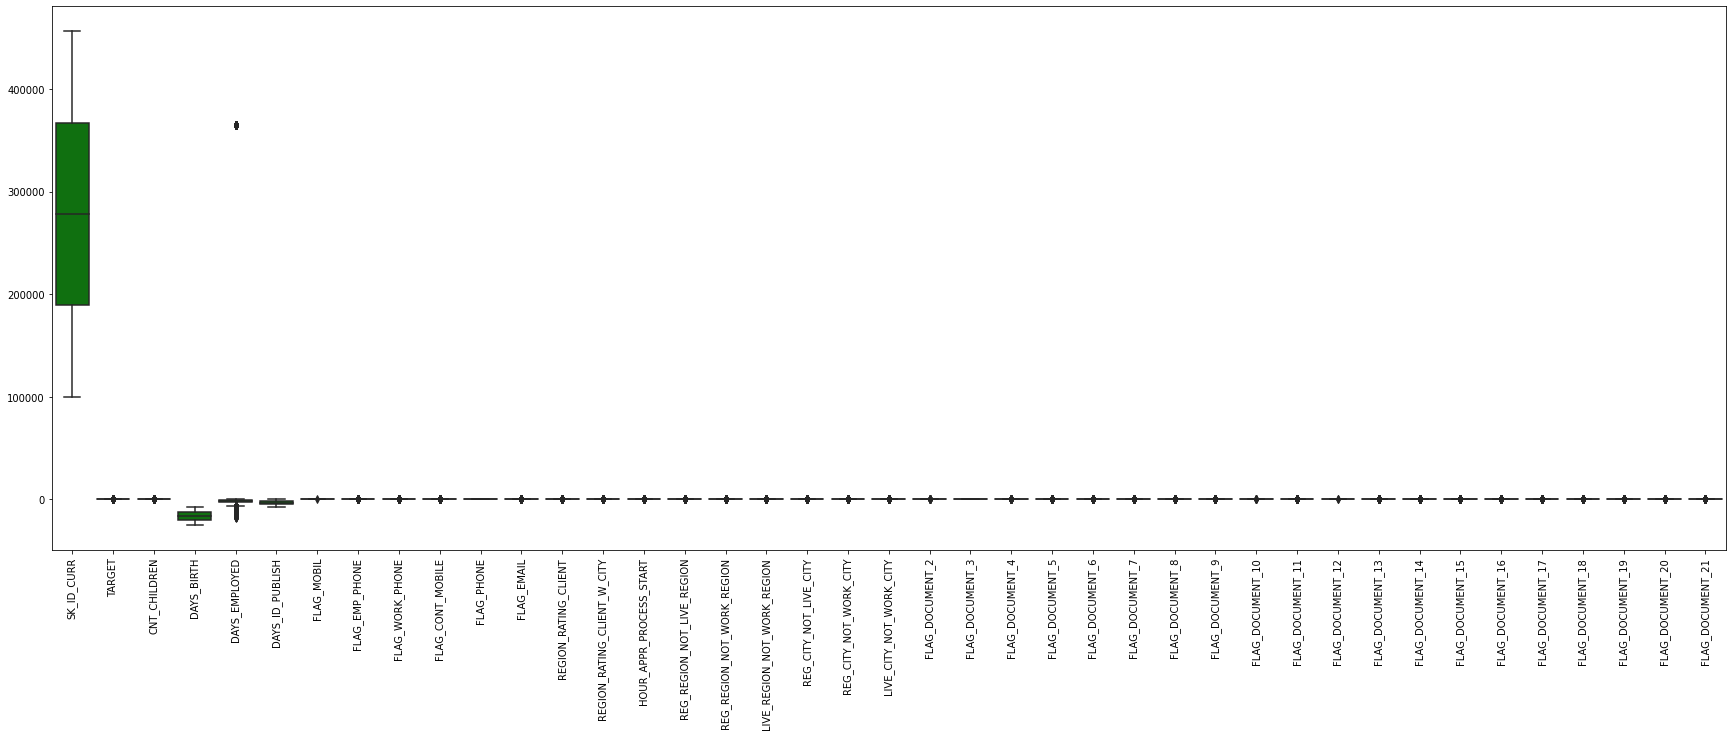

In [28]:
plt.figure(figsize=(30,10))
sns.boxplot(data=data1.select_dtypes('int'),color = 'green')
plt.xticks(rotation=90)
plt.show()

## Float Type Value's :

In [29]:
print("Float type data : ", np.count_nonzero(data1.select_dtypes('float').columns))
print("---------------------------------------------------")
print(data1.select_dtypes('float').columns)

Float type data :  65
---------------------------------------------------
Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'OWN_CAR_AGE',
       'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATA

## Missing Value detection:

In [30]:
print("Missing values of Floating Type Variables are as :")
missing(data1.select_dtypes('float'))

Missing values of Floating Type Variables are as :


,"""Total",Percentage
COMMONAREA_MODE,214865,69.872297
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953
FLOORSMIN_MEDI,208642,67.848630


## Missing Value Imputation:

In [31]:
data1 = data1.select_dtypes('float').interpolate(method ='linear', limit_direction ='forward')
missing(data1.select_dtypes('float'))

,"""Total",Percentage
OWN_CAR_AGE,2,0.000650


In [32]:
data1 = data1.dropna(axis = 1)
missing(data1)

,"""Total",Percentage


## Outlier Detection:

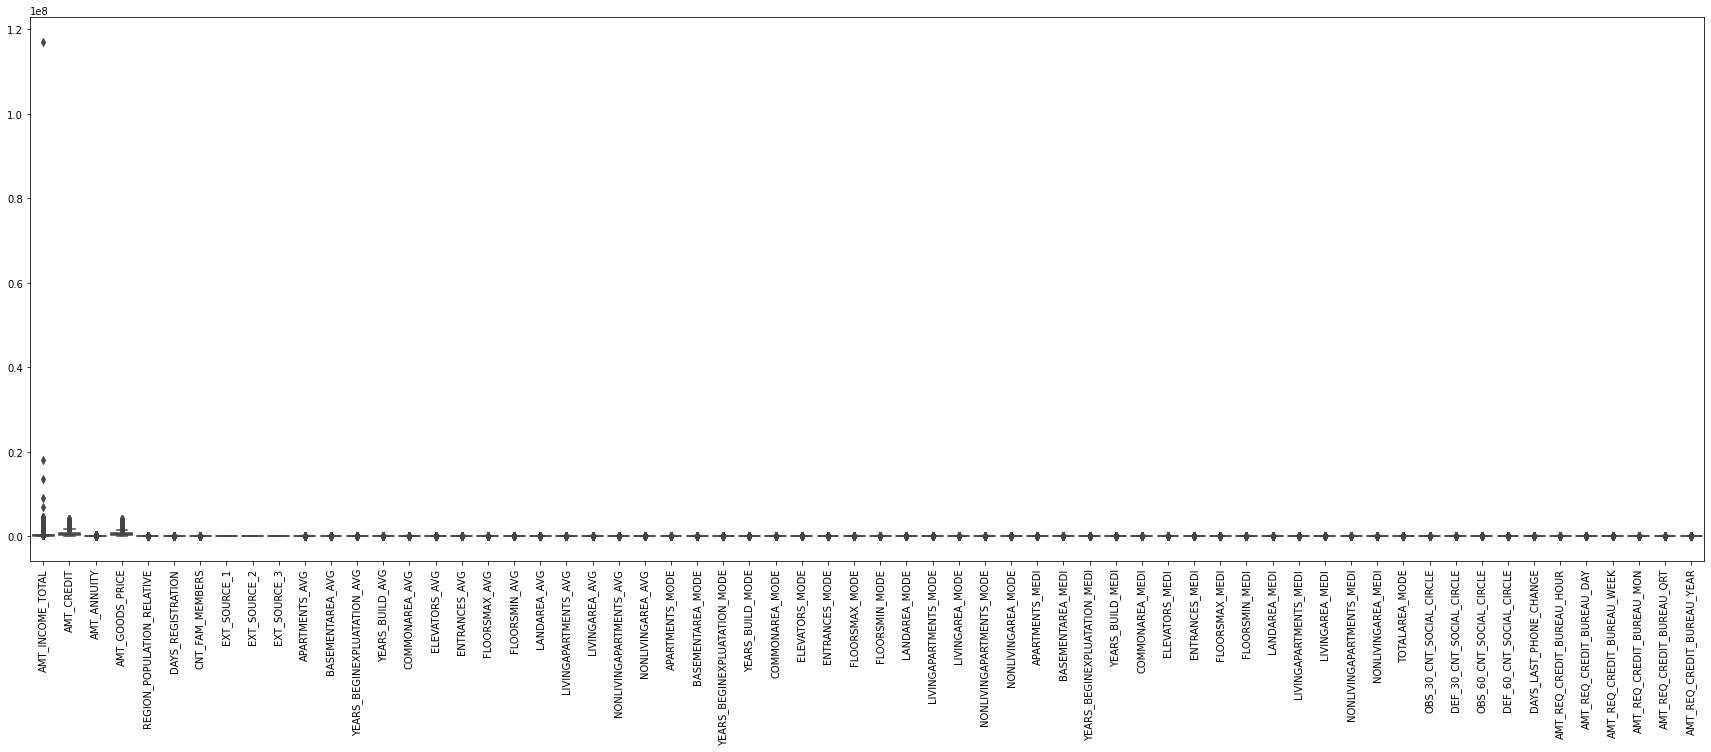

In [33]:
plt.figure(figsize=(30,10))
sns.boxplot(data=data1.select_dtypes('float'))
plt.xticks(rotation=90)
plt.show()

## Checking Distribution of variables using Histogram:

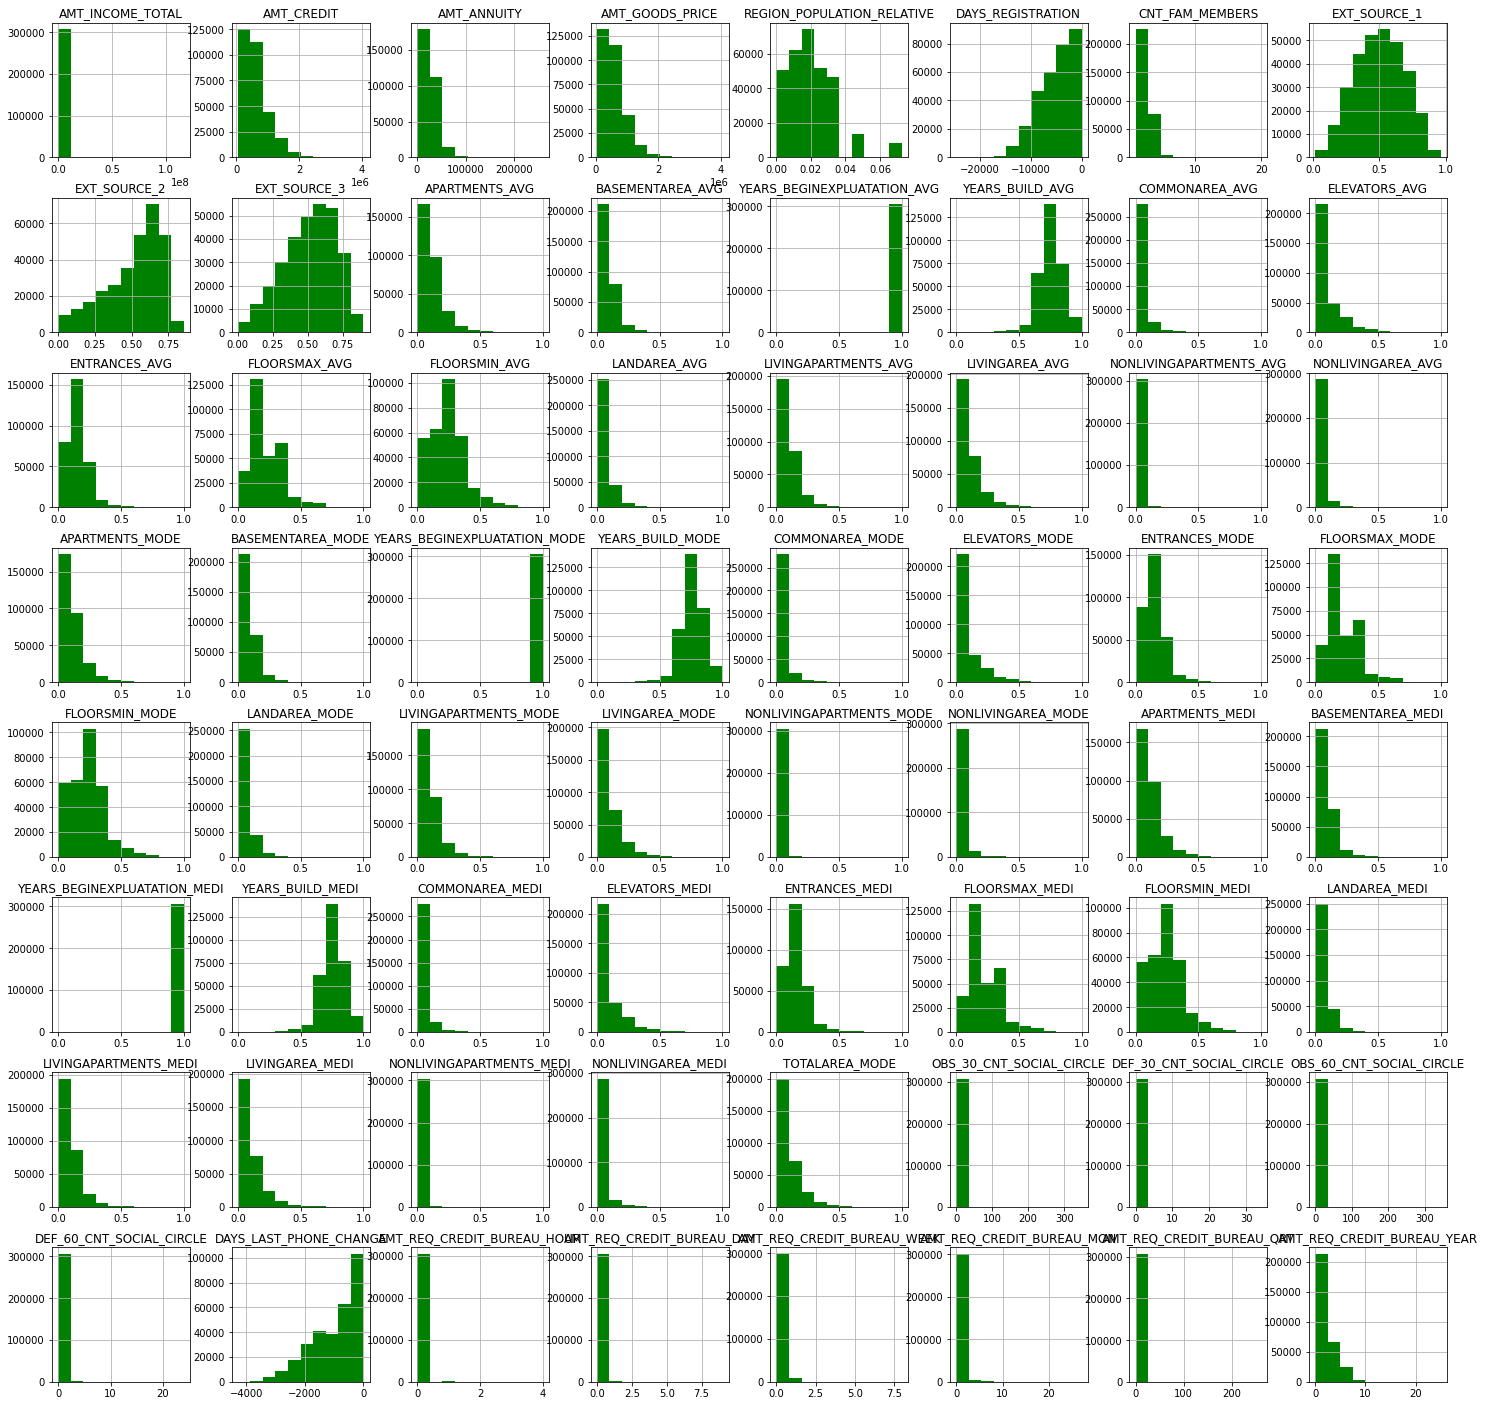

In [34]:
data1.select_dtypes('float').hist(figsize=(25,25),color = 'green')
plt.show()

## Relation Between Variables:

In [35]:
def color_(value):
    if value < 0 :
        color = 'red'
    elif value == 1 :
        color = 'blue'
    else:
        color = 'green'
    return 'color: %s' % color
data1.select_dtypes('int').corr().style.applymap(color_)

In [36]:
data = data.interpolate(method ='linear', limit_direction ='forward')
data = data.dropna(axis = 1)
missing(data)

,"""Total",Percentage


Hence,all missing values are now imputing.

## Exploratary Data Analysis :

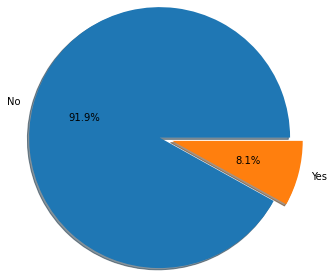

In [37]:
r = data.groupby('TARGET')['TARGET'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%',  shadow=True);

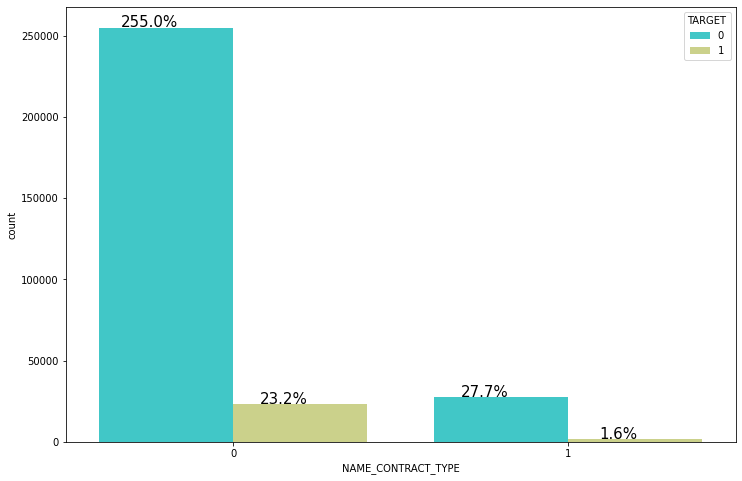

In [38]:
plt.figure(figsize=(12,8))
ax =sns.countplot(data["NAME_CONTRACT_TYPE"],hue=data["TARGET"],palette = 'rainbow')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/100000)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate(percentage,(x, y),ha='center',va='center',size=15, xytext=(0, 5),textcoords='offset points')
plt.show()

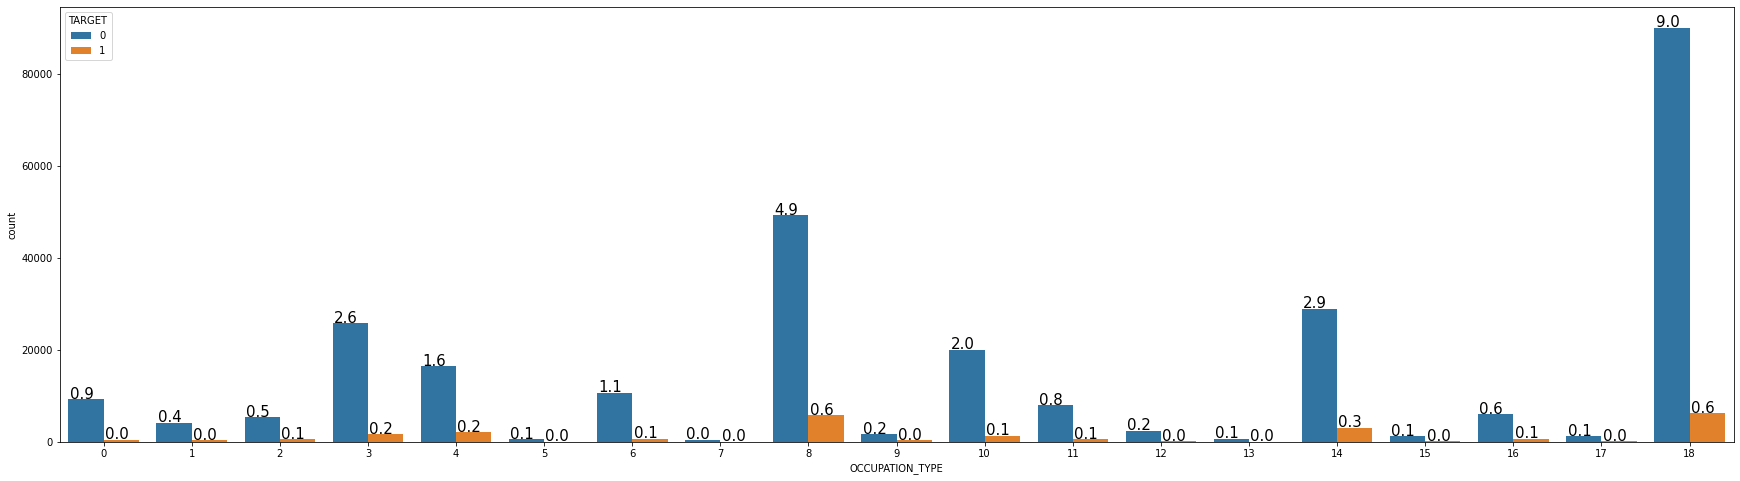

In [39]:
plt.figure(figsize=(30,8))
ax =sns.countplot(data["OCCUPATION_TYPE"],hue=data["TARGET"])
for p in ax.patches:
    percentage = '{:.1f}'.format(100 * p.get_height()/1000000)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate( percentage,(x, y),ha='center',va='center',size=15, xytext=(0, 5),textcoords='offset points')
plt.show()

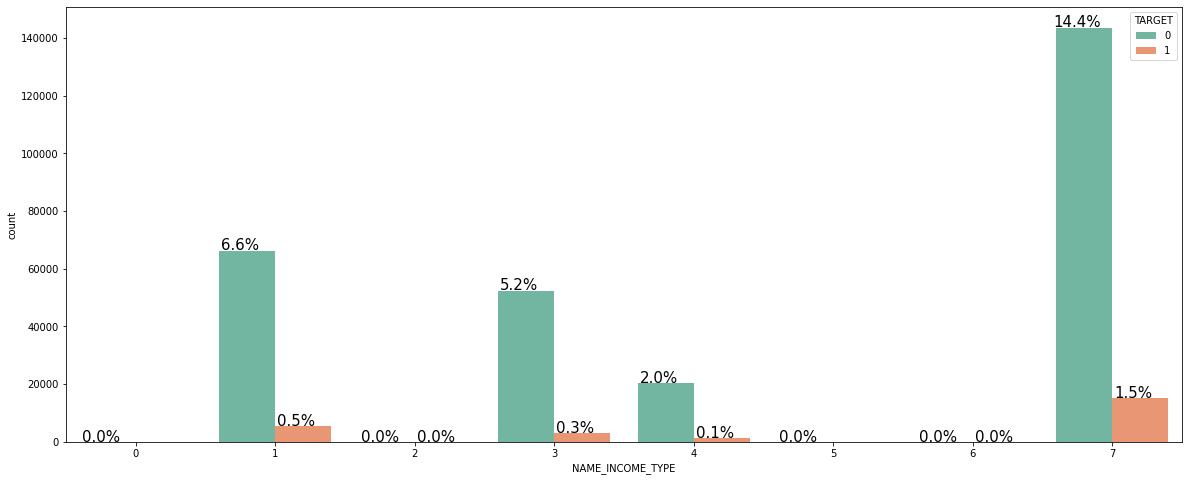

In [40]:
plt.figure(figsize=(20,8))
ax =sns.countplot(data["NAME_INCOME_TYPE"],hue=data["TARGET"],palette="Set2")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/1000000)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate( percentage,(x, y),ha='center',va='center',size=15, xytext=(0, 5),textcoords='offset points')
plt.show()

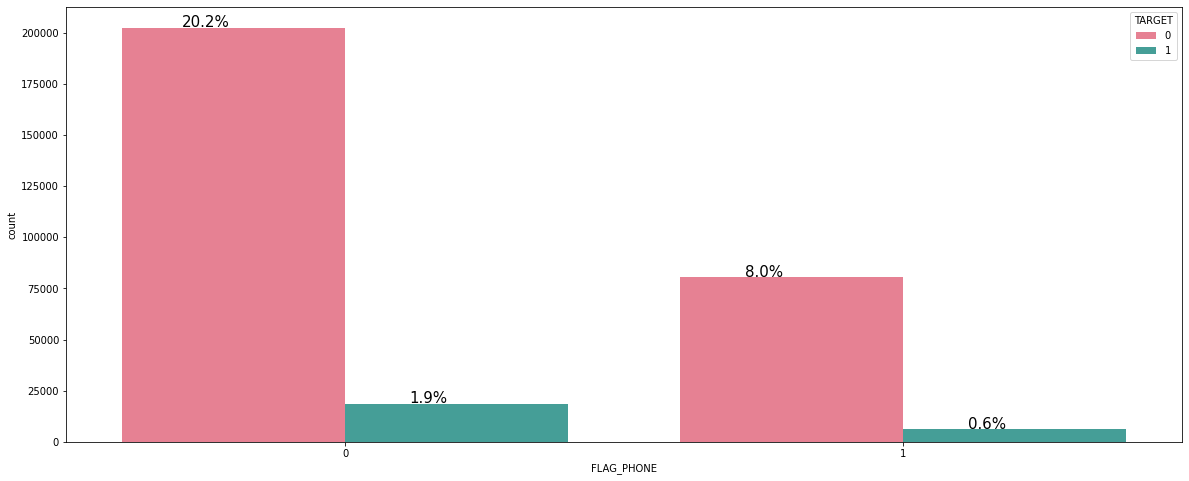

In [41]:
plt.figure(figsize=(20,8))
ax =sns.countplot(data["FLAG_PHONE"],hue=data["TARGET"],palette="husl")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() /1000000)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate( percentage,(x, y),ha='center',va='center',size=15, xytext=(0, 5),textcoords='offset points')
plt.show()

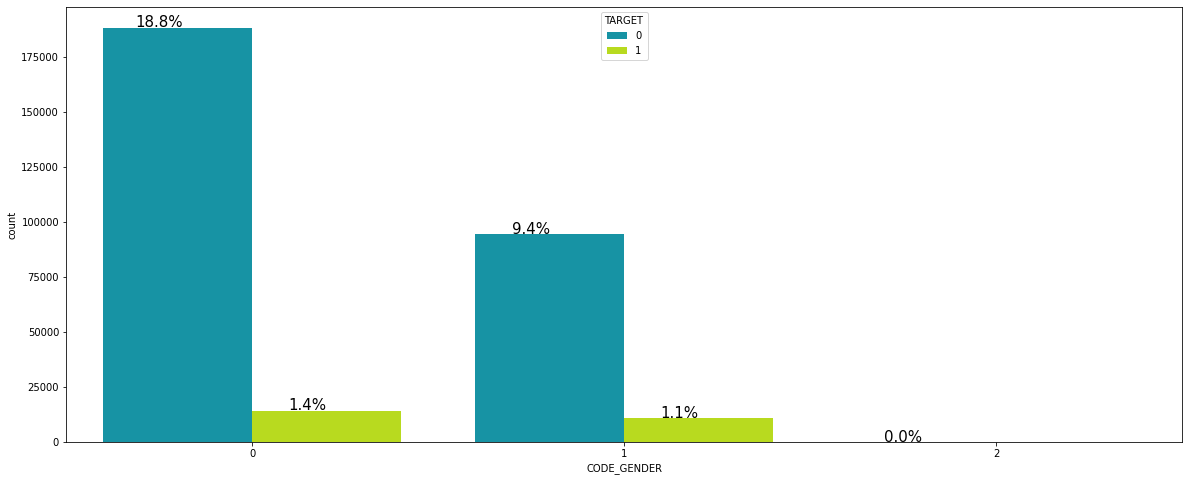

In [42]:
plt.figure(figsize=(20,8))
ax =sns.countplot(data["CODE_GENDER"],hue=data["TARGET"],palette="nipy_spectral")
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() /1000000)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_height()
    ax.annotate( percentage,(x, y),ha='center',va='center',size=15, xytext=(0, 5),textcoords='offset points')
plt.show()

In [43]:
## Function to plot stacked bar chart
def stacked_plot(x):
    sns.set_palette(sns.color_palette("nipy_spectral", 8))
    tab1 = pd.crosstab(x,data['TARGET'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['TARGET'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(7,4))
    plt.xticks(rotation=360)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="TARGET",bbox_to_anchor=(1,1))
    sns.despine(top=True,right=True,left=True) # to remove side line from graph
    #plt.legend(labels)
    plt.show()

TARGET                   0      1     All
NAME_CONTRACT_TYPE                       
0                   255011  23221  278232
1                    27675   1604   29279
All                 282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


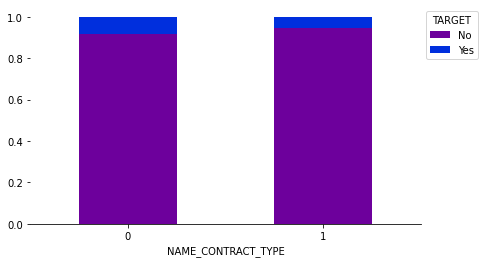

TARGET            0      1     All
CODE_GENDER                       
0            188278  14170  202448
1             94404  10655  105059
2                 4      0       4
All          282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


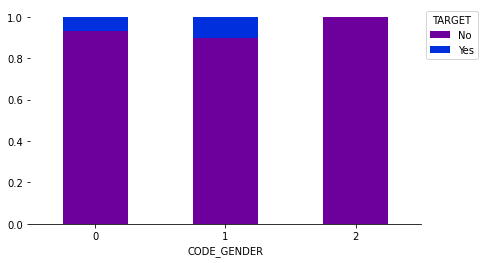

TARGET             0      1     All
FLAG_OWN_CAR                       
0             185675  17249  202924
1              97011   7576  104587
All           282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


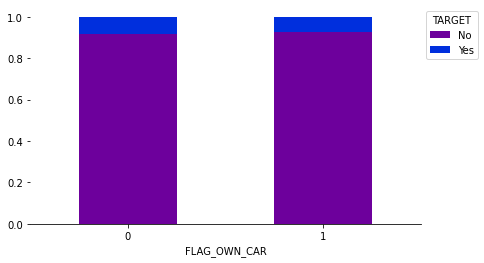

TARGET                0      1     All
FLAG_OWN_REALTY                       
0                 86357   7842   94199
1                196329  16983  213312
All              282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


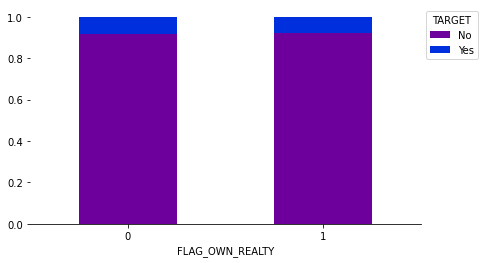

TARGET                0      1     All
NAME_TYPE_SUITE                       
0                  3026    241    3267
1                 37140   3009   40149
2                   248     23     271
3                   790     76     866
4                  1596    174    1770
5                 10475    895   11370
6                228189  20337  248526
7                  1222     70    1292
All              282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


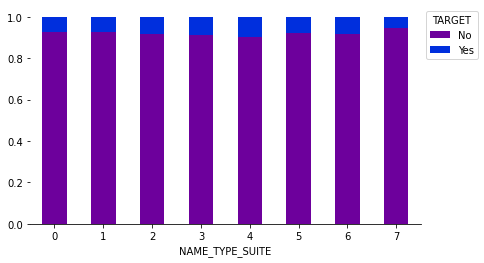

TARGET                 0      1     All
NAME_INCOME_TYPE                       
0                     10      0      10
1                  66257   5360   71617
2                      3      2       5
3                  52380   2982   55362
4                  20454   1249   21703
5                     18      0      18
6                     14      8      22
7                 143550  15224  158774
All               282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


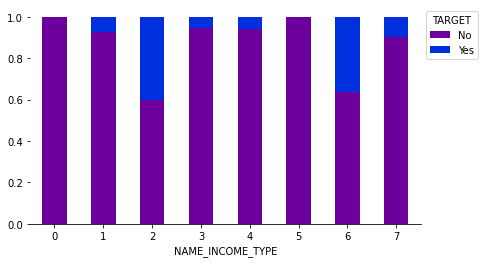

TARGET                    0      1     All
NAME_EDUCATION_TYPE                       
0                       161      3     164
1                     70854   4009   74863
2                      9405    872   10277
3                      3399    417    3816
4                    198867  19524  218391
All                  282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


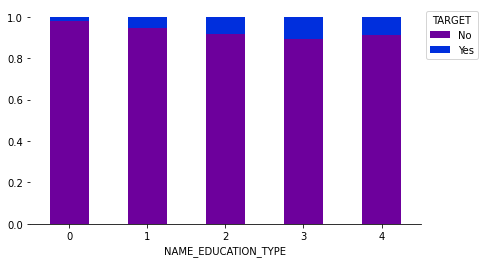

TARGET                   0      1     All
NAME_FAMILY_STATUS                       
0                    26814   2961   29775
1                   181582  14850  196432
2                    18150   1620   19770
3                    40987   4457   45444
4                        2      0       2
5                    15151    937   16088
All                 282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


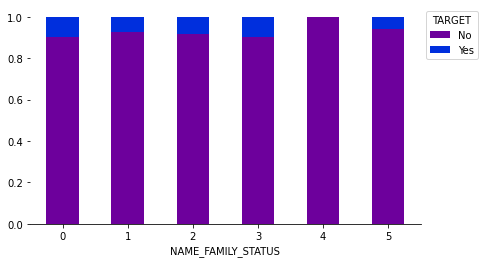

TARGET                  0      1     All
NAME_HOUSING_TYPE                       
0                    1033     89    1122
1                  251596  21272  272868
2                   10228    955   11183
3                    2445    172    2617
4                    4280    601    4881
5                   13104   1736   14840
All                282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


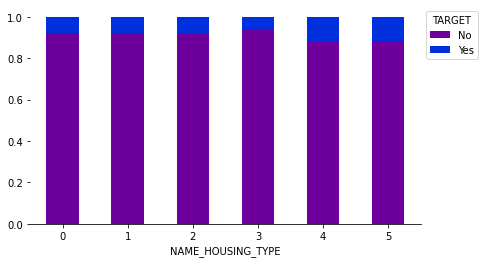

TARGET                0      1     All
OCCUPATION_TYPE                       
0                  9339    474    9813
1                  4206    447    4653
2                  5325    621    5946
3                 25832   1738   27570
4                 16496   2107   18603
5                   527     36     563
6                 10679    701   11380
7                   492     34     526
8                 49348   5838   55186
9                  1734    359    2093
10                20043   1328   21371
11                 7965    572    8537
12                 2477    175    2652
13                  692     59     751
14                29010   3092   32102
15                 1213     92    1305
16                 5999    722    6721
17                 1196    152    1348
18                90113   6278   96391
All              282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


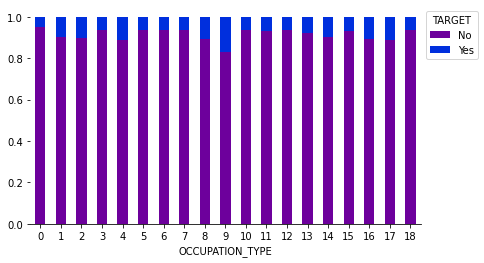

TARGET                           0      1     All
WEEKDAY_APPR_PROCESS_START                       
0                            46237   4101   50338
1                            46780   3934   50714
2                            31182   2670   33852
3                            14898   1283   16181
4                            46493   4098   50591
5                            49400   4501   53901
6                            47696   4238   51934
All                         282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


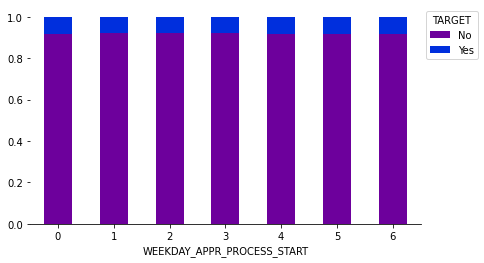

TARGET                  0      1     All
ORGANIZATION_TYPE                       
0                     394     35     429
1                    2197    257    2454
2                    2377    130    2507
3                    5497    487    5984
4                    9653    900   10553
5                   61669   6323   67992
6                     231     29     260
7                    5936    785    6721
8                     358     21     379
9                     887     63     950
10                    520     40     560
11                   9678    726   10404
12                    904     62     966
13                   2723    235    2958
14                    924    115    1039
15                    102      7     109
16                   2470    234    2704
17                    355     14     369
18                     58      9      67
19                    425     33     458
20                   2930    348    3278
21                    788     89     877
22              

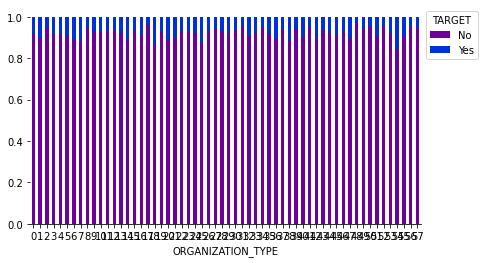

TARGET                   0      1     All
FONDKAPREMONT_MODE                       
0                   192170  18125  210295
1                     5258    429    5687
2                     5292    327    5619
3                    68678   5152   73830
4                    11288    792   12080
All                 282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


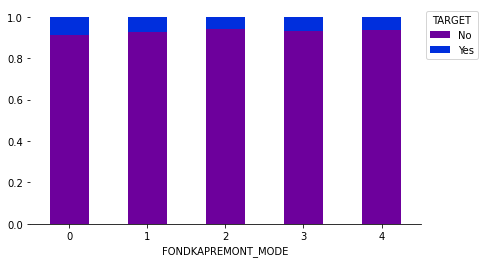

TARGET               0      1     All
HOUSETYPE_MODE                       
0               140053  10450  150503
1               140177  14120  154297
2                 1347    152    1499
3                 1109    103    1212
All             282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


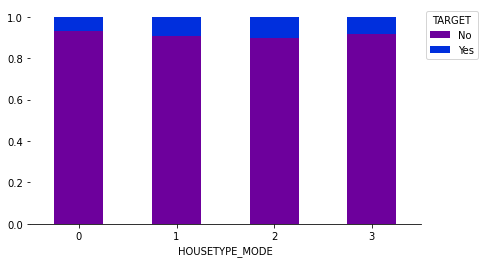

TARGET                   0      1     All
WALLSMATERIAL_MODE                       
0                     8603    650    9253
1                     2123    173    2296
2                     1695     84    1779
3                     1490    135    1625
4                    61848   4192   66040
5                    60015   4800   64815
6                     4842    520    5362
7                   142070  14271  156341
All                 282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


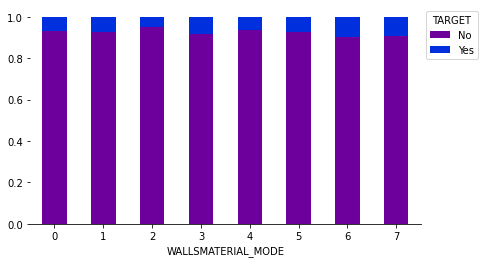

TARGET                    0      1     All
EMERGENCYSTATE_MODE                       
0                    148324  11104  159428
1                      2105    223    2328
2                    132257  13498  145755
All                  282686  24825  307511
------------------------------------------------------------------------------------------------------------------------


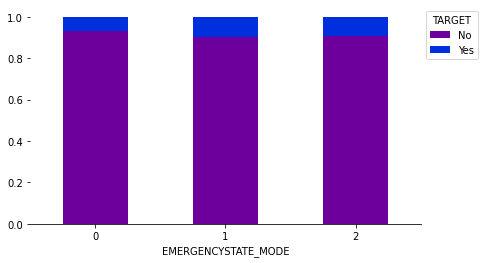

In [44]:
list_columns=['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE']
for i, variable in enumerate(list_columns):
       stacked_plot(data[variable])

## Correlation Between Variables:

C:\Users\sakshi\AppData\Roaming\Python\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


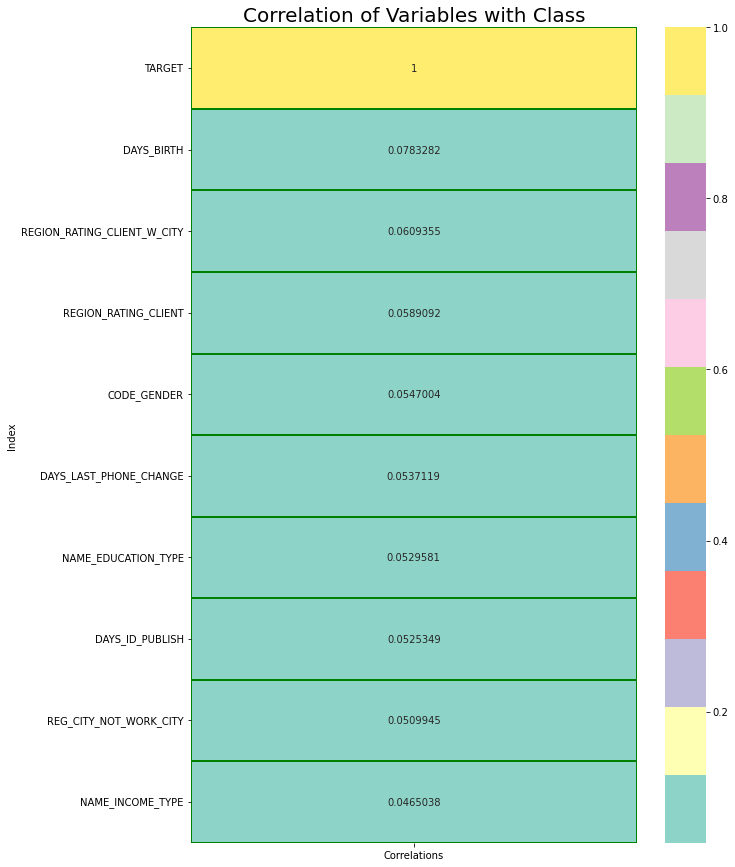

In [45]:
corr = data.corrwith(data['TARGET'],method='spearman').reset_index()

corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False).head(10)

plt.figure(figsize=(10, 15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='Set3', linewidths=0.4, linecolor='green')

plt.title("Correlation of Variables with Class", fontsize=20)
plt.show()

## Selecting 10 best features :

## Feature Selection Techniques:
#### Why is Feature Selection important? 
In the machine learning process, feature selection is used to make the process more accurate. It also increases the prediction power of the algorithms by selecting the most critical variables and eliminating the redundant and irrelevant ones.

In [46]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
X = data.drop(['TARGET'],axis = 1)
y = data['TARGET']

In [48]:
X.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
y.head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int8

## Information Gain:

In [50]:
from sklearn.feature_selection import mutual_info_classif

In [51]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=12)
fit = bestfeatures.fit(X,y,)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score'] 
print("Top Best Features after Feature Selection using Information Gain")
print("_________________________________________________________________")
print(featureScores.nlargest(12,'Score'))

Top Best Features after Feature Selection using Information Gain
_________________________________________________________________
                        Feature     Score
20                   FLAG_MOBIL  0.065802
23             FLAG_CONT_MOBILE  0.065078
12          NAME_EDUCATION_TYPE  0.044249
21               FLAG_EMP_PHONE  0.044185
10              NAME_TYPE_SUITE  0.042409
14            NAME_HOUSING_TYPE  0.040698
29  REGION_RATING_CLIENT_W_CITY  0.038979
28         REGION_RATING_CLIENT  0.038163
95              FLAG_DOCUMENT_3  0.032793
4               FLAG_OWN_REALTY  0.031099
88          EMERGENCYSTATE_MODE  0.029397
11             NAME_INCOME_TYPE  0.023045


## Splitting the Data into Train and Test:

In [52]:
X = data[['FLAG_CONT_MOBILE','FLAG_MOBIL','FLAG_EMP_PHONE','NAME_TYPE_SUITE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
         'FLAG_DOCUMENT_3','FLAG_OWN_REALTY','EMERGENCYSTATE_MODE','NAME_INCOME_TYPE']]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2, random_state = 20)
sc=StandardScaler()
sc.fit(X_train)
X_train= sc.transform(X_train)
sc.fit(X_test)
X_test=sc.transform(X_test)
X.shape

(307511, 12)

In [53]:
import pickle
import os

In [54]:
scaler_path = os.path.join('C:/Users/sakshi/Downloads/Credit Card Detection Project/','models/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(sc,scaler_file)

# LOGISTIC REGRESSION:

In [103]:
#IMPLEMENTING THE MODEL
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(X_train,Y_train)
y_pred = logreg.predict(X_test)

In [104]:
#PREDICTING THE TEST RESULTS AND CALCULATING THE ACCURACY
y_pred = logreg.predict(X_test)
LR_score=logreg.score(X_test, Y_test)*100
print('Accuracy of logistic regression classifier on test set: {:.2f}%'.format(LR_score))

Accuracy of logistic regression classifier on test set: 91.93%


Text(0.5, 15.0, 'Predictions')

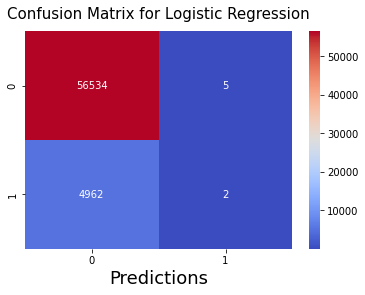

In [110]:
# Confusion matrix for Logistic Regression
ax= plt.subplot()
cm= confusion_matrix(Y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g',cmap="coolwarm")
plt.title("Confusion Matrix for Logistic Regression", fontsize=15, y=1.03)
plt.xlabel('Predictions', fontsize=18)


# K- NEAREST NEIGHBOR(KNN) :

In [106]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')
knn.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)

In [107]:
y_pred =  knn.predict(X_test)

In [60]:
ac_knn = accuracy_score(Y_test,y_pred)*100
print('Accuracy of KNN algorithm on test set: {:.2f}%'.format(ac_knn))

Accuracy of KNN algorithm on test set: 91.92%


Text(33.0, 0.5, 'Actuals')

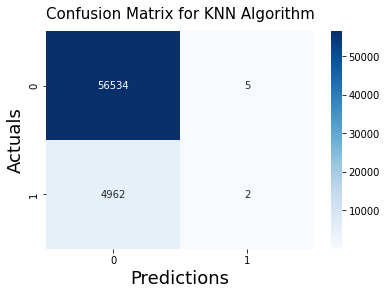

In [61]:
# Confusion matrix for KNN Algorithm
ax= plt.subplot()
cm= confusion_matrix(Y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g',cmap="Blues")
plt.title("Confusion Matrix for KNN Algorithm", fontsize=15, y=1.03) 
#cmap=plt.cm.Greens
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)

# DECISION TREE CLASSIFIER:

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 3, criterion = "entropy", min_samples_leaf = 5 , random_state = 100,splitter = 'best')

In [63]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [64]:
y_pred = dt.predict(X_test)

In [65]:
ac_dt=accuracy_score(Y_test,y_pred)*100

In [66]:
print('Accuracy of Decision Tree algorithm on test set: {:.2f}%'.format(ac_dt))

Accuracy of Decision Tree algorithm on test set: 91.93%


Text(33.0, 0.5, 'Actuals')

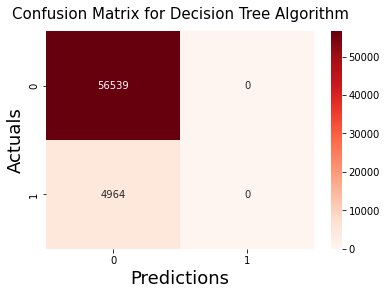

In [67]:
# Confusion matrix for Decision Tree Algorithm
ax= plt.subplot()
cm= confusion_matrix(Y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g',cmap= "Reds")
plt.title("Confusion Matrix for Decision Tree Algorithm", fontsize=15, y=1.03) 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)

# RANDOM FOREST ALGORITHM :

In [68]:
rf = RandomForestClassifier(criterion='entropy',
                                 n_estimators=100,
                                 random_state= 10,
                                 n_jobs=2,max_depth = 5, max_features = 10)

In [69]:
rf.fit(X_train,Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=10,
                       n_jobs=2, random_state=10)

In [70]:
y_pred=rf.predict(X_test)

In [71]:
ac_rf=accuracy_score(Y_test,y_pred)*100

In [72]:
print('Accuracy of Random Forest algorithm on test set: {:.2f}%'.format(ac_rf))

Accuracy of Random Forest algorithm on test set: 91.93%


Text(33.0, 0.5, 'Actuals')

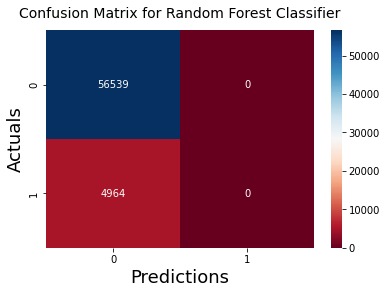

In [73]:
# Confusion matrix for KNN Algorithm
ax= plt.subplot()
cm= confusion_matrix(Y_test,y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g',cmap="RdBu")
plt.title("Confusion Matrix for Random Forest Classifier", fontsize=14, y=1.03)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)

In [98]:
# Fitting classifier to the Training set
from sklearn.svm import SVC
classifier = SVC(random_state=0) # for non-linear model use this parametre kernel='rbf'
classifier.fit(X_train, Y_train)

SVC(random_state=0)

In [99]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [100]:
classifier = accuracy_score(Y_test,y_pred)*100

In [101]:
print('Accuracy of SVM algorithm on test set: {:.2f}%'.format(classifier))

Accuracy of SVM algorithm on test set: 91.93%


# NAIVE BAYES ALGORITHM:

In [74]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [75]:
y_pred  =  nb.predict(X_test)

In [76]:
ac_nb = accuracy_score(Y_test,y_pred)*100

In [95]:
print('Accuracy of NAIVE BAYES algorithm on test set: {:.2f}%'.format(ac_nb))

Accuracy of NAIVE BAYES algorithm on test set: 89.83%


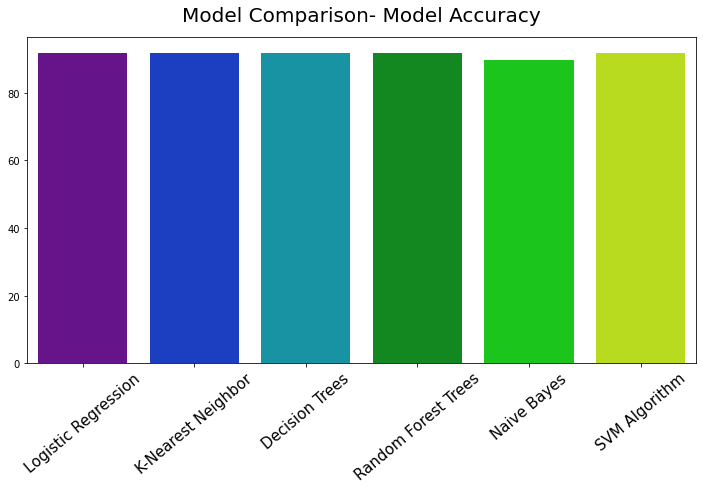

In [112]:
x=["Logistic Regression",
   "K-Nearest Neighbor",
   "Decision Trees",
   "Random Forest Trees",
   "Naive Bayes",
   "SVM Algorithm"]
y=[LR_score,
   ac_knn,
   ac_dt,
   ac_rf,
   ac_nb,
   classifier]
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(x=x,y=y)
plt.ylabel=("Model Accuracy")
plt.xticks(rotation=40, fontsize=15)
plt.title("Model Comparison- Model Accuracy", fontsize=20, y=1.03)
plt.show()

In [89]:
import joblib
model_path = os.path.join('C:/Users/sakshi/Downloads/Credit Card Detection Project/','models/rf.sav')
joblib.dump(rf,model_path)

['C:/Users/sakshi/Downloads/Credit Card Detection Project/models/rf.sav']

In [90]:
# Selecting columns by passing a list of desired columns
data[['FLAG_CONT_MOBILE','FLAG_MOBIL','FLAG_EMP_PHONE','NAME_TYPE_SUITE','NAME_EDUCATION_TYPE','NAME_HOUSING_TYPE','REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT',
         'FLAG_DOCUMENT_3','FLAG_OWN_REALTY','EMERGENCYSTATE_MODE','NAME_INCOME_TYPE']].head()

,FLAG_CONT_MOBILE,FLAG_MOBIL,FLAG_EMP_PHONE,NAME_TYPE_SUITE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,FLAG_DOCUMENT_3,FLAG_OWN_REALTY,EMERGENCYSTATE_MODE,NAME_INCOME_TYPE
0,1,1,1,6,4,1,2,2,1,1,0,7
1,1,1,1,1,1,1,1,1,1,0,0,4
2,1,1,1,6,4,1,2,2,0,1,2,7
3,1,1,1,6,4,1,2,2,1,1,2,7
4,1,1,1,6,4,1,2,2,0,1,2,7


In [91]:
data.NAME_TYPE_SUITE.unique()

array([6, 1, 5, 0, 3, 7, 4, 2])

In [92]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [93]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow


In [94]:
# sequential model to initialise our ann and dense module to build the layers
import keras

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
from keras.models import Sequential
from keras.layers import Dense